# Create PMELTS KLB1 phase diagram

Import required libraries:

In [1]:
import pyMelt as m
from pyMelt import phaseDiagramTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
klb1 = pd.read_csv('klb1_pmelts_grid.csv')
klb1.head()

,Unnamed: 0,pressure,temperature,cpx_mass,g_mass,liq_mass,ol_mass,pl_mass,spn_mass,opx_mass,...,g_CaO_wtpt,g_Fe2O3_wtpt,g_FeO_wtpt,g_MgO_wtpt,g_Na2O_wtpt,g_SiO2_wtpt,g_TiO2_wtpt,g_almandine,g_grossular,g_pyrope
0,4,0.001,1120,0.057181,0.0,0.000000,0.667873,0.094423,0.0,0.180523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,0.001,1130,0.055305,0.0,0.004936,0.670316,0.093016,0.0,0.176426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,0.001,1140,0.046902,0.0,0.039629,0.687438,0.080517,0.0,0.145514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,0.001,1150,0.030923,0.0,0.120965,0.729417,0.047606,0.0,0.071089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,0.001,1160,0.007893,0.0,0.209272,0.771065,0.011770,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add cation fractions that are useful for lattice-strain partition coefficient calculations:

In [3]:
# Properties needed for cpx Ds
klb1['cpx_xMgM1'] = klb1['cpx_diopside'] + klb1['cpx_clinoenstatite'] + 0.5*klb1['cpx_buffonite'] + 0.5*klb1['cpx_alumino-buffonite']
klb1['cpx_xCaM2'] = klb1['cpx_diopside'] + klb1['cpx_hedenbergite'] + klb1['cpx_buffonite'] + klb1['cpx_alumino-buffonite'] + klb1['cpx_essenite']
klb1['cpx_xAlM1'] = klb1['cpx_alumino-buffonite'] + klb1['cpx_essenite']
klb1['liq_Mg#'] =  klb1['liq_endmMg2SiO4'] / (klb1['liq_endmFe2SiO4'] + klb1['liq_endmMg2SiO4'])

# Garnet Ds:
klb1['g_uvarovite'] = 0.0
klb1['g_spessartine'] = 0.0
klb1['g_andradite'] = 0.0

In [4]:
klb1_grid = phaseDiagramTools.gridsMelts(klb1)

In [5]:
parameters = ['ol_mass', 'g_mass', 'cpx_mass', 'opx_mass', 'spn_mass', 'pl_mass', 
              'liq_SiO2_wtpt', 'liq_MgO_wtpt', 'liq_FeO_wtpt', 'liq_Fe2O3_wtpt', 'liq_CaO_wtpt',
              'liq_Na2O_wtpt', 'liq_Al2O3_wtpt', 'liq_TiO2_wtpt', 'temperature',
              'g_pyrope', 'g_grossular', 'g_almandine', 'g_uvarovite', 'g_spessartine', 'g_andradite', 
              'g_FeO_wtpt','pl_anorthite', 'pl_albite',
              'cpx_xMgM1', 'cpx_xCaM2', 'cpx_xAlM1', 'liq_Mg#']

vars_edge_vals = ['g_pyrope', 'g_grossular', 'g_almandine', 'g_uvarovite', 'g_spessartine', 'g_andradite', 'g_FeO_wtpt',
                  'cpx_xMgM1', 'cpx_xCaM2', 'cpx_xAlM1', 'pl_anorthite', 'pl_albite']

In [6]:
phased = phaseDiagramTools.phaseDiagram(klb1_grid, parameters, vars_edge_vals=parameters)

/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/phaseDiagramTools.py:97: RuntimeWarning: invalid value encountered in double_scalars
  dydx = (y.loc[last_finite_ind] - y.loc[last_finite_ind - 1])/(x.loc[last_finite_ind] - x.loc[last_finite_ind - 1])


## Check the interpolated phase diagram

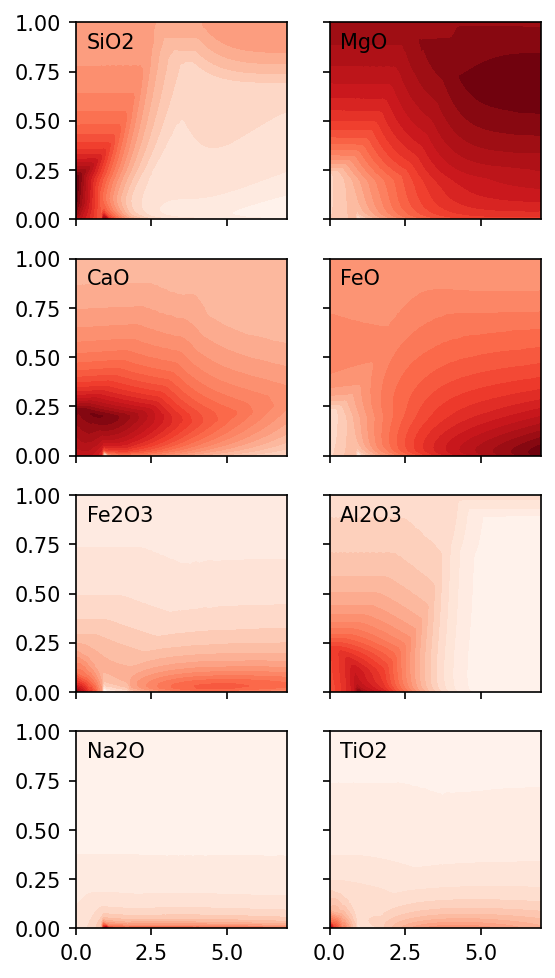

In [7]:
oxides = ['SiO2', 'MgO', 'CaO', 'FeO', 'Fe2O3', 'Al2O3', 'Na2O', 'TiO2']
p = np.linspace(0, 7, 100)
f = np.linspace(0, 1, 100)

pp, ff = np.meshgrid(p, f)

cc = np.zeros(np.shape(pp))

f, a = plt.subplots(4, 2, dpi=150, figsize=[4, 8], sharex='col', sharey='row')
a = np.ravel(a).tolist()


for n in range(len(oxides)):
    for i in range(np.shape(pp)[0]):
        for j in range(np.shape(pp)[1]):
            state = pd.Series({'P': pp[i,j],'F': ff[i,j]})
            cc[i,j] = phased('liq_' + oxides[n] + '_wtpt', state)
    
    a[n].contourf(pp, ff, cc, levels=25, cmap=plt.cm.Reds)
    a[n].text(0.05, 0.95, oxides[n], transform=a[n].transAxes, va='top', ha='left')

plt.show()

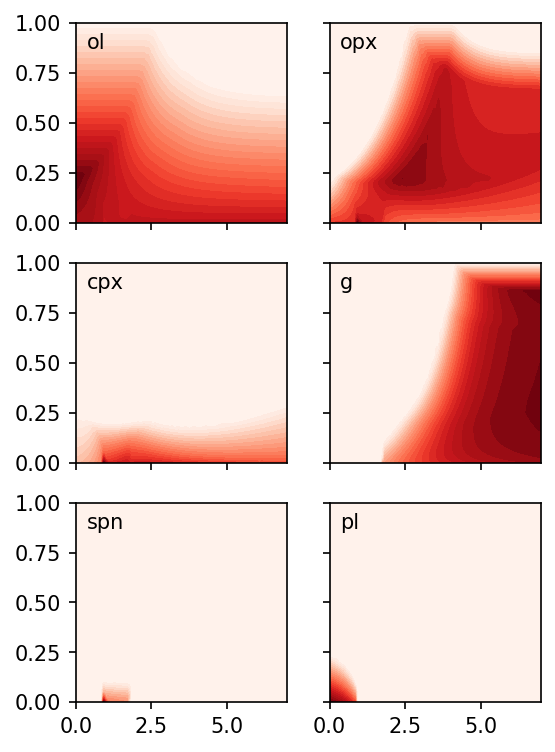

In [8]:
phases = ['ol', 'opx', 'cpx', 'g', 'spn', 'pl']
p = np.linspace(0, 7, 100)
f = np.linspace(0, 1, 100)

pp, ff = np.meshgrid(p, f)

cc = np.zeros(np.shape(pp))

f, a = plt.subplots(3, 2, dpi=150, figsize=[4, 6], sharex='col', sharey='row')
a = np.ravel(a).tolist()


for n in range(len(phases)):
    for i in range(np.shape(pp)[0]):
        for j in range(np.shape(pp)[1]):
            state = pd.Series({'P': pp[i,j],'F': ff[i,j]})
            cc[i,j] = phased(phases[n] + '_mass', state)
    
    a[n].contourf(pp, ff, cc, levels=25, cmap=plt.cm.Reds)
    a[n].text(0.05, 0.95, phases[n], transform=a[n].transAxes, va='top', ha='left')

plt.show()

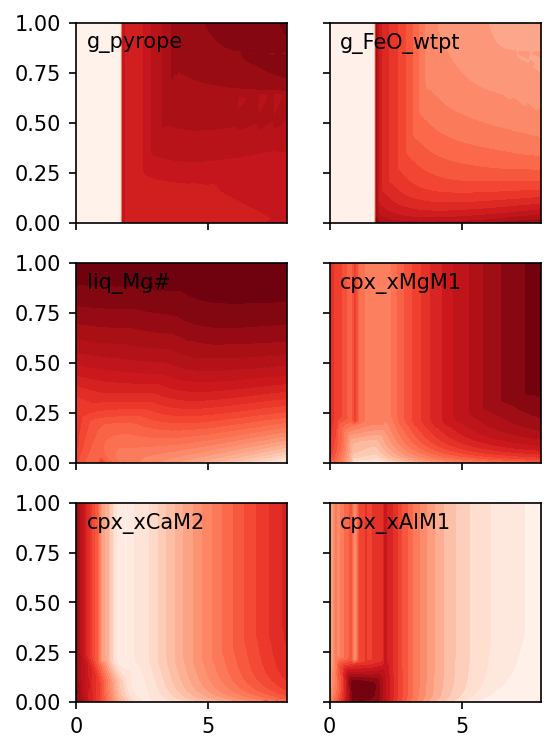

In [9]:
props = ['g_pyrope', 'g_FeO_wtpt', 'liq_Mg#', 'cpx_xMgM1', 'cpx_xCaM2', 'cpx_xAlM1']
p = np.linspace(0, 8, 100)
f = np.linspace(0, 1, 100)

pp, ff = np.meshgrid(p, f)

cc = np.zeros(np.shape(pp))

f, a = plt.subplots(3, 2, dpi=150, figsize=[4, 6], sharex='col', sharey='row')
a = np.ravel(a).tolist()


for n in range(len(props)):
    for i in range(np.shape(pp)[0]):
        for j in range(np.shape(pp)[1]):
            state = pd.Series({'P': pp[i,j],'F': ff[i,j]})
            cc[i,j] = phased(props[n], state)
    
    a[n].contourf(pp, ff, cc, levels=25, cmap=plt.cm.Reds)
    a[n].text(0.05, 0.95, props[n], transform=a[n].transAxes, va='top', ha='left')

plt.show()

In [10]:
pickle.dump(phased, open( "melts_klb1.p", "wb" ))